In [ ]:
import pandas as pd

# 1. Đọc dữ liệu

## a. Nạp dữ liệu

In [ ]:
data = pd.read_csv("/Data/job.csv")

## b. Lấy các thông số dữ liệu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     4596 non-null   object
 1   company_name  4596 non-null   object
 2   location      4596 non-null   object
 3   start_date    4596 non-null   object
 4   ctc           4596 non-null   object
 5   experience    4596 non-null   object
 6   posted        4596 non-null   object
dtypes: object(7)
memory usage: 251.5+ KB


In [ ]:
data["posted"].value_counts()

,count
posted,
3 weeks ago,1326
1 week ago,1031
2 weeks ago,936
3 days ago,198
2 days ago,138
4 days ago,109
6 days ago,100
5 days ago,98
1 week ago\n\n\nBe an early applicant,84


# 2. Xử lý dữ liệu

## a. Làm sạch cột posted, trích xuất và chuyển đổi mức lương (CTC)

In [ ]:
data["posted"] = data["posted"].str.replace("\n\n\nBe an early applicant", "")
data["min_ctc"] = data["ctc"].str.split("-").str[0].str.strip().str.replace("₹", "").str.replace(",", "")
data["max_ctc"] = data["ctc"].str.split("-").str[-1].str.strip().str.replace("₹", "").str.replace(",", "")
data[["min_ctc", "max_ctc"]] = data[["min_ctc", "max_ctc"]].apply(pd.to_numeric, errors='coerce')

*   Tách mức lương tối thiểu (min_ctc) và tối đa (max_ctc) từ cột ctc.
*   Loại bỏ các ký tự ₹ và dấu , để chỉ giữ giá trị số.
*   Chuyển đổi các giá trị thành kiểu số (numeric) và xử lý lỗi (gán NaN nếu không thể chuyển đổi).


In [ ]:
data.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc
1388,Business Development Manager,GMGR INDIA Private Limited,"Mumbai, Jaipur, Delhi",Starts Immediately,"₹ 4,00,000 - 6,00,000",0-5 years,Few hours ago,400000.0,600000.0
3805,Business Development Associate,Wayspire Edtech Private Limited,Gurgaon,Starts Immediately,"₹ 2,50,000 - 4,00,000",0-2 years,3 weeks ago,250000.0,400000.0
2615,Tele Counselor,Prishatech India (OPC) Private Limited (Rojgar...,Gurgaon,Starts Immediately,"₹ 2,00,000 - 2,50,000",0-2 years,2 weeks ago,200000.0,250000.0
2746,Customer Service Associate,SPRS Soultions Private Limited,"Mumbai, Hyderabad, Bangalore",Starts Immediately,"₹ 2,64,000 - 3,24,000",0-2 years,2 weeks ago,264000.0,324000.0
128,Sports Manager,Decathlon Sport India Private Limited,Mumbai,Starts Immediately,"₹ 3,50,000 - 4,00,000",0-2 years,2 weeks ago,350000.0,400000.0


## b. Trích xuất và chuyển đổi kinh nghiệm

In [ ]:
data["experience"] = data["experience"].str.replace(" years", "")
data["min_experience"] = data["experience"].str.split("-").str[0].str.strip()
data["max_experience"] = data["experience"].str.split("-").str[-1].str.strip()
data[["min_experience", "max_experience"]] = data[["min_experience", "max_experience"]].apply(pd.to_numeric, errors='coerce')



*   Loại bỏ chuỗi years trong cột experience.
*   Tách kinh nghiệm tối thiểu (min_experience) và tối đa (max_experience).
*   Chuyển đổi các giá trị này thành kiểu số.



In [ ]:
data.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc,min_experience,max_experience
358,Sales And Marketing Trainee (MBA),Ecovista Industries Pvt Ltd,West Bengal,Starts Immediately,"₹ 5,00,000 - 6,00,000",1-4,1 week ago,500000.0,600000.0,1.0,4.0
4408,Business Development Executive,R3 Consultant,Pune,Starts Immediately,"₹ 2,40,000 - 3,60,000",1-3,3 weeks ago,240000.0,360000.0,1.0,3.0
1605,Trainer,Imparta Computer Solutions,Lucknow,Starts Immediately,"₹ 2,00,000",0-2,3 days ago,200000.0,200000.0,0.0,2.0
1075,HR Recruiter (BPO),TheCoinRepublic,Bhopal,Starts Immediately,"₹ 2,00,000 - 4,50,000",0-2,1 week ago,200000.0,450000.0,0.0,2.0
211,Marketing Executive,Right Health & Pharmaceuticals,Mumbai,Starts Immediately,"₹ 3,00,000 - 8,00,000",1-5,1 day ago,300000.0,800000.0,1.0,5.0


In [ ]:
data["posted"].value_counts()

,count
posted,
3 weeks ago,1407
1 week ago,1115
2 weeks ago,1014
3 days ago,244
2 days ago,187
4 days ago,135
5 days ago,111
6 days ago,104
1 day ago,103


## c. Chuyển đổi cột *posted* sang ngày

In [ ]:
def convert_to_days(posted):
    if 'week' in posted:
        return int(posted.split()[0]) * 7
    elif 'days' in posted:
        return int(posted.split()[0])
    elif 'hour' in posted or 'Just now' in posted or 'Few hours ago' in posted or 'Today' in posted:
        return 0

data['posted'] = data['posted'].apply(convert_to_days)

Chuyển đổi thời gian đăng tin tuyển dụng từ chuỗi (posted) sang số ngày:
*   Nếu có từ week, nhân số tuần với 7.
*   Nếu có từ days, giữ nguyên số ngày.
*   Nếu là hour, Today, hoặc tương tự, gán giá trị là 0 (ngày hiện tại).





In [ ]:
data.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc,min_experience,max_experience
1175,Content Writer,Verbinden Communication Private Limited,Bangalore,Starts Immediately,"₹ 4,50,000 - 5,25,000",0-5,7.0,450000.0,525000.0,0.0,5.0
3633,Assistant Photographer,Amita Morye,Thane,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2,21.0,200000.0,300000.0,0.0,2.0
2163,Full Stack Developer,ScholarNest Technologies Private Limited,Bangalore,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-2,7.0,200000.0,300000.0,0.0,2.0
145,Audit Associate,Writer Safeguard Private Limited,Jaipur,Starts Immediately,"₹ 2,00,000 - 2,50,000",0-2,21.0,200000.0,250000.0,0.0,2.0
1451,Recruiter-Non-IT,SCGB Solutions,Bangalore,Starts Immediately,"₹ 2,40,000 - 3,00,000",0-2,2.0,240000.0,300000.0,0.0,2.0


# 3. Phân tích dữ liệu

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## a. Theo kinh nghiệm

<ipython-input-13-affdfb19bedb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience', data=data, palette='viridis')


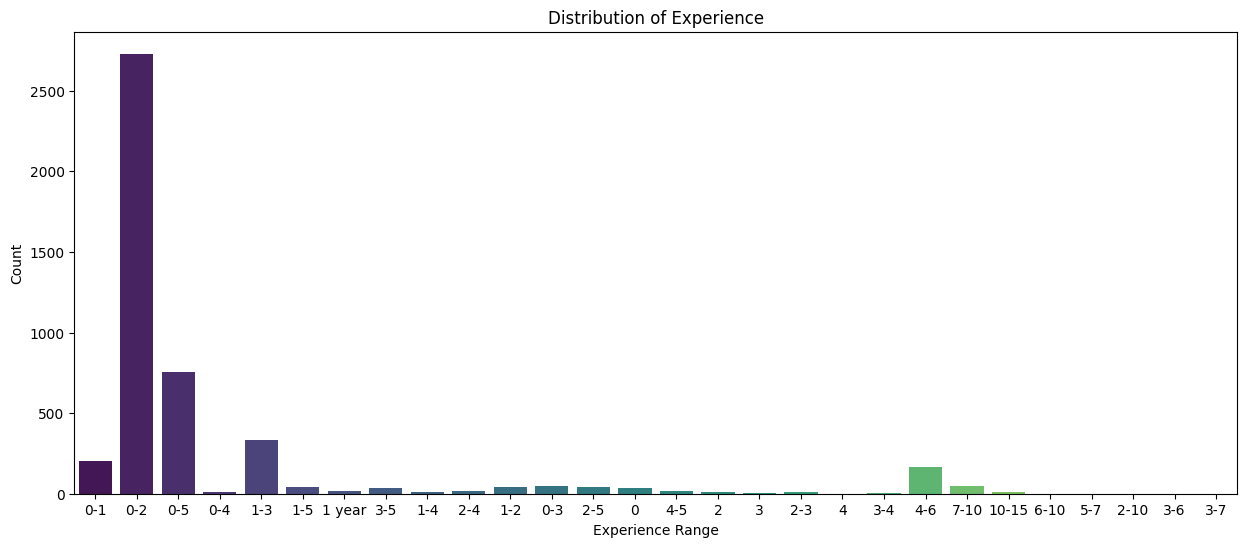

In [ ]:
# Distribution of Experience
plt.figure(figsize=(15, 6))
sns.countplot(x='experience', data=data, palette='viridis')
plt.title('Distribution of Experience')
plt.xlabel('Experience Range')
plt.ylabel('Count')
plt.show()



> Nhận xét:
- Các công việc yêu cầu kinh nghiệm từ 0-2 năm chiếm tỷ lệ cao nhất, cho thấy đây là các công việc phù hợp cho sinh viên mới tốt nghiệp hoặc người có ít kinh nghiệm.
- Những công việc yêu cầu kinh nghiệm nhiều hơn xuất hiện ít hơn, phản ánh thị trường tuyển dụng tập trung vào đối tượng lao động trẻ.



## b. Theo mức lương

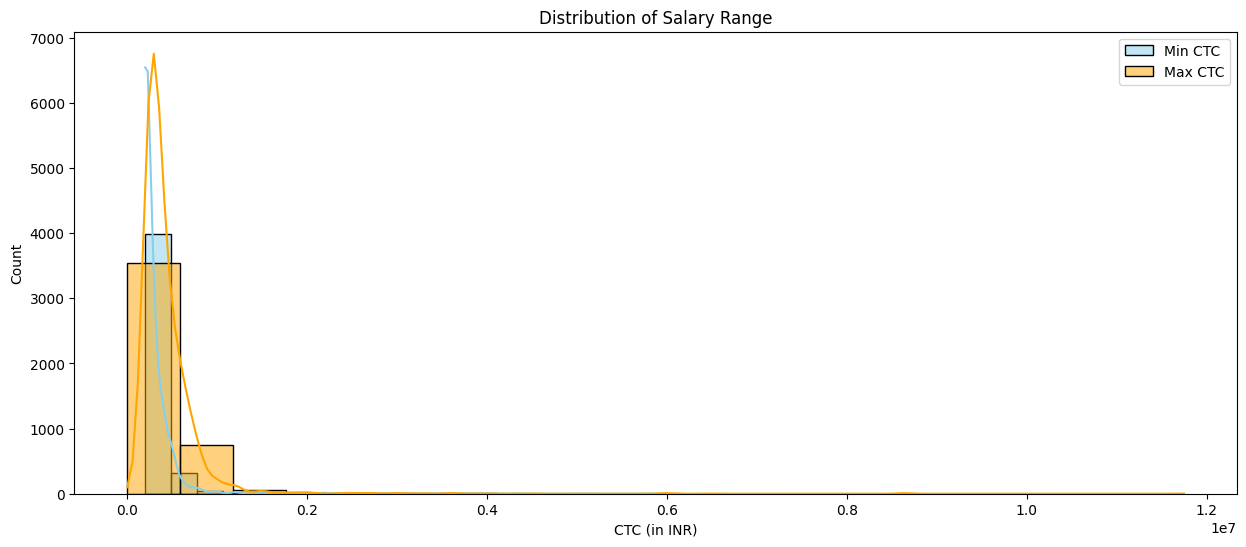

In [ ]:
# Distribution of Salary Range
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='min_ctc', bins=20, kde=True, color='skyblue', label='Min CTC')
sns.histplot(data=data, x='max_ctc', bins=20, kde=True, color='orange', label='Max CTC')
plt.title('Distribution of Salary Range')
plt.xlabel('CTC (in INR)')
plt.ylabel('Count')
plt.legend()
plt.show()



> Nhận xét:
- Mức lương tối thiểu (Min CTC) và tối đa (Max CTC) đều tập trung trong khoảng dưới 5,00,000 INR.
- Một số ít công việc có mức lương cao hơn, nhưng đây không phải là phần lớn.
- Điều này phản ánh rằng hầu hết các công việc được tuyển dụng thuộc phân khúc phổ thông với mức lương vừa phải.



## c. Theo số lượng chức danh công việc

<ipython-input-15-3197d8ae53ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_title', data=data, palette='muted', order=top_10_titles.index)


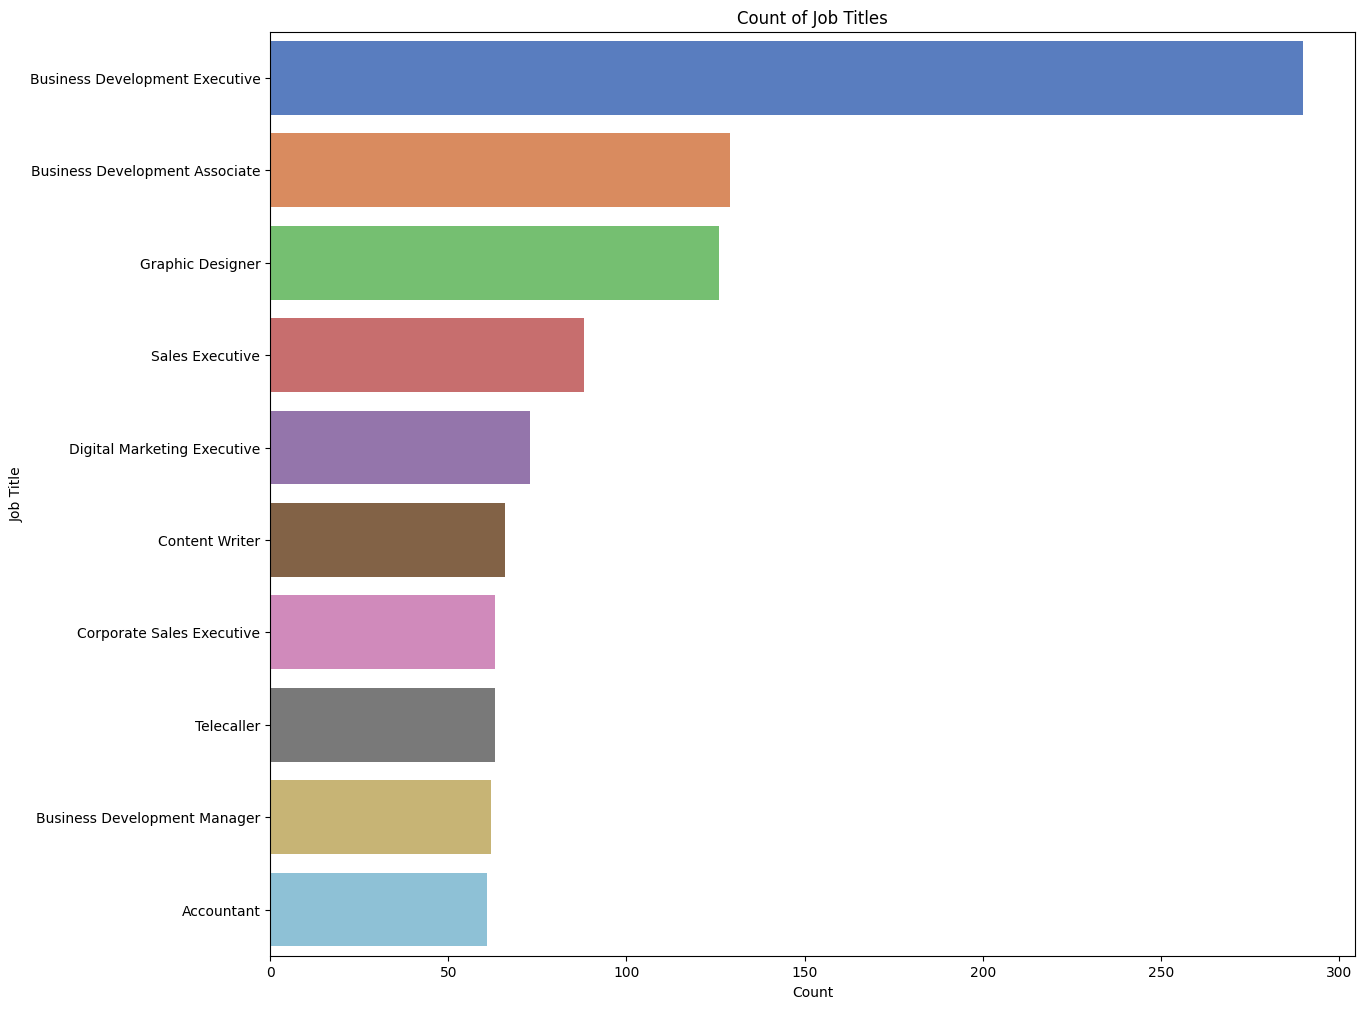

In [ ]:
# Count of Job Titles

top_10_titles = data['job_title'].value_counts().head(10)
plt.figure(figsize=(14, 12))
sns.countplot(y='job_title', data=data, palette='muted', order=top_10_titles.index)
plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()



> Nhận xét:
- Một số chức danh công việc như 'Business Development Associate', 'Business Development Executive', 'Graphic Designer' xuất hiện nhiều lần, cho thấy nhu cầu tuyển dụng cao trong các lĩnh vực này.
- Các công việc khác như 'Accountant' hoặc 'Telecaller',... cũng có mặt, nhưng với số lượng ít hơn.



## d. Biểu đồ hộp cho mức lương theo chức danh công việc

<ipython-input-16-8a3c679737f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='min_ctc', y='job_title', data=data[:10], palette='Set2')


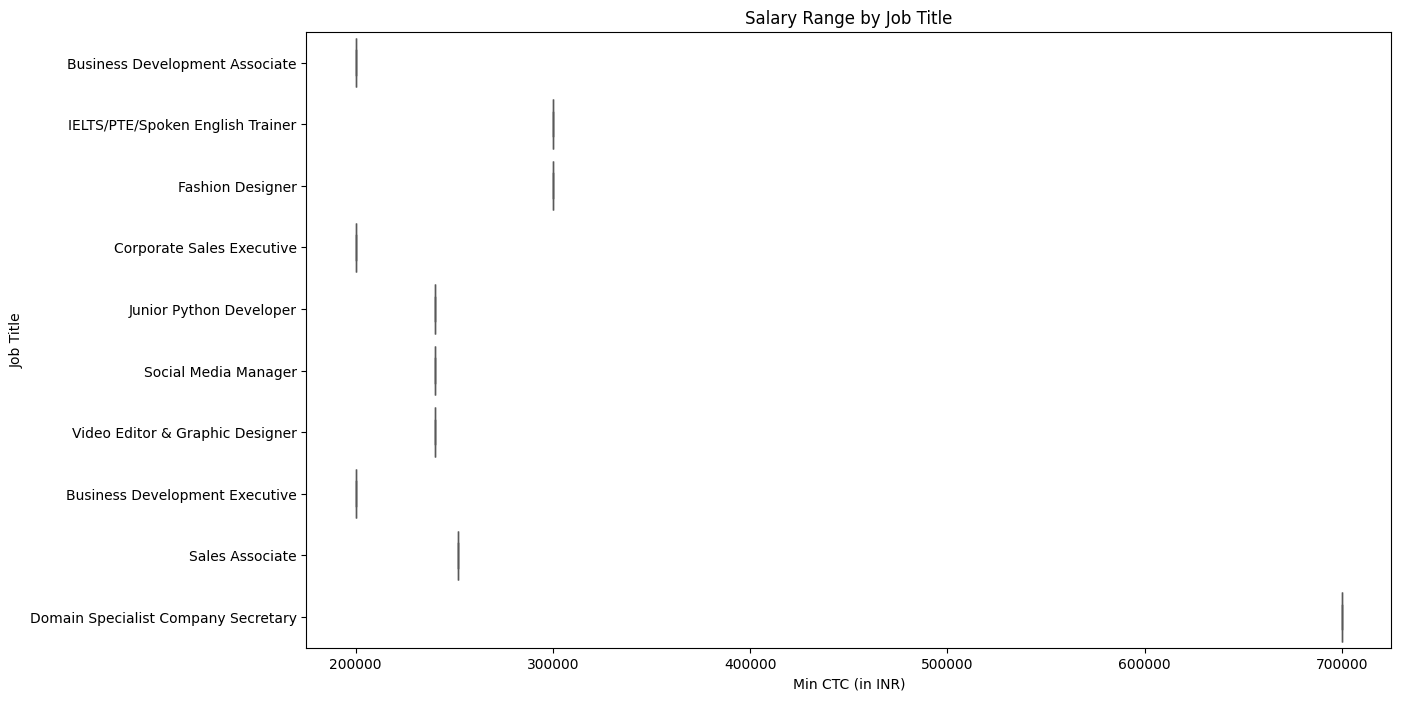

In [ ]:
# Boxplot for Salary Range by Job Title
plt.figure(figsize=(14, 8))
sns.boxplot(x='min_ctc', y='job_title', data=data[:10], palette='Set2')
plt.title('Salary Range by Job Title')
plt.xlabel('Min CTC (in INR)')
plt.ylabel('Job Title')
plt.show()



> Nhận xét:
- Các chức danh công việc có sự khác biệt lớn về mức lương tối thiểu (Min CTC).
- Một số công việc như 'Fashion Designer', 'IELTS/PTE/Spoken English Trainer' có mức lương khởi điểm cao hơn so với các công việc khác, phản ánh giá trị của kỹ năng công nghệ và ngoại ngữ trong thị trường lao động.



## e. Biểu đồ cặp cho các cột số liệu

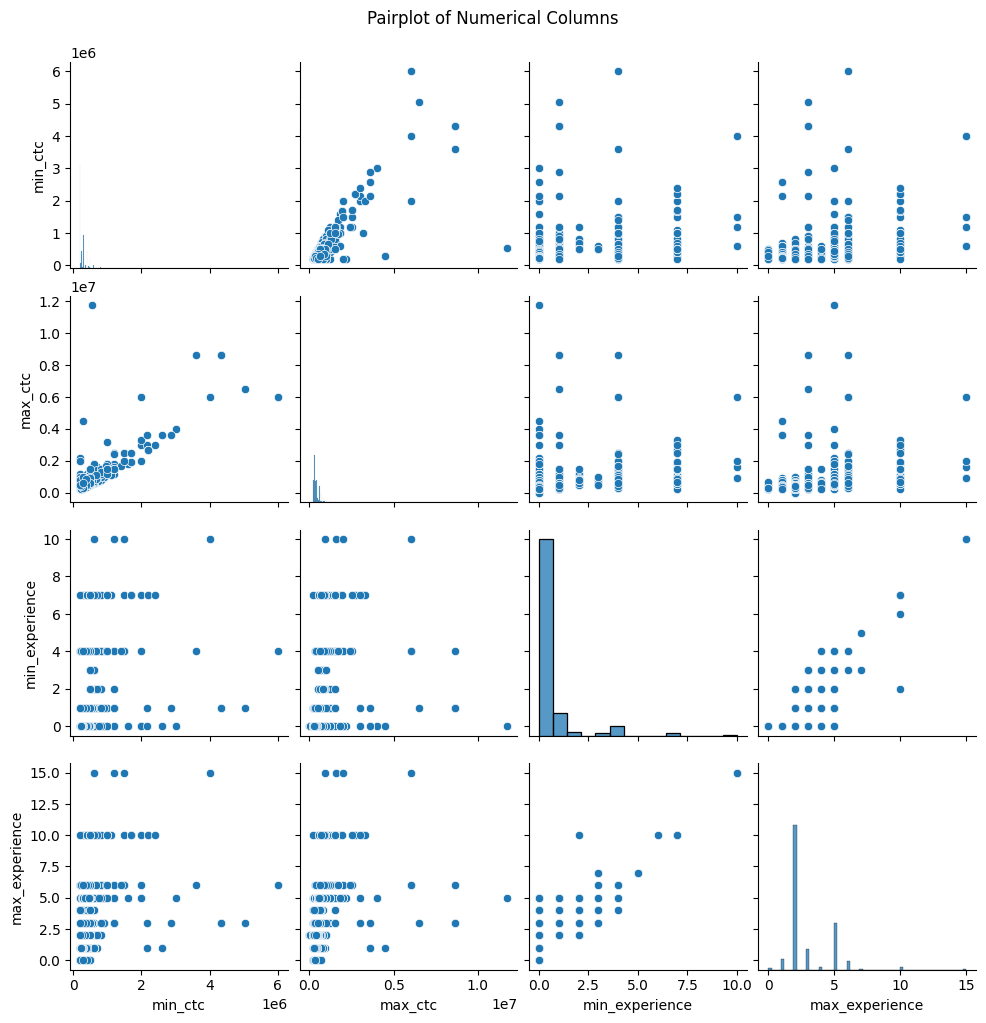

In [ ]:
# Pairplot for numerical columns
sns.pairplot(data[['min_ctc', 'max_ctc', 'min_experience', 'max_experience']])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()



> Nhận xét:
- Có mối tương quan mạnh giữa mức lương tối thiểu (Min CTC) và mức lương tối đa (Max CTC).
- Không có mối quan hệ rõ ràng giữa kinh nghiệm và mức lương, điều này cho thấy các yếu tố khác như kỹ năng và vị trí địa lý cũng ảnh hưởng đến lương.



# 4. Huấn luận mô hình

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

## a. Tiền xử lý dữ liệu

In [ ]:
# Preprocessing: Filter data and create target variable
data['job_title'] = data['job_title'].fillna('Unknown')  # Fill missing job titles
data['growth_potential'] = data['max_ctc'] > data['max_ctc'].median()  # Binary target: Above median salary

In [ ]:
# Encode categorical job titles as numeric values
le = LabelEncoder()
data['job_title_encoded'] = le.fit_transform(data['job_title'])

In [ ]:
# Feature selection
X = data[['min_ctc', 'max_ctc', 'job_title_encoded']].dropna()  # Use salary and encoded job titles
y = data['growth_potential'].dropna()[:len(X)]  # Target variable

## b. Huấn luyện

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## c. Dự đoán kết quả

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

Accuracy: 70.84%

Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.86      0.77       756
        True       0.73      0.50      0.59       561

    accuracy                           0.71      1317
   macro avg       0.71      0.68      0.68      1317
weighted avg       0.71      0.71      0.70      1317



In [ ]:
# Decode job titles with high growth potential
coefficients = model.coef_[0]
top_jobs_indices = np.argsort(coefficients)[-3:][::-1]
top_jobs = [le.inverse_transform([index])[0] for index in top_jobs_indices]

print("\nTop 3 Job Titles with High Growth Potential:\n", top_jobs)


Top 3 Job Titles with High Growth Potential:
 ['2D Animator', '3D Animator', '.NET Developer']


<ipython-input-28-2351b8446821>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs_counts, y=top_jobs, palette='viridis')


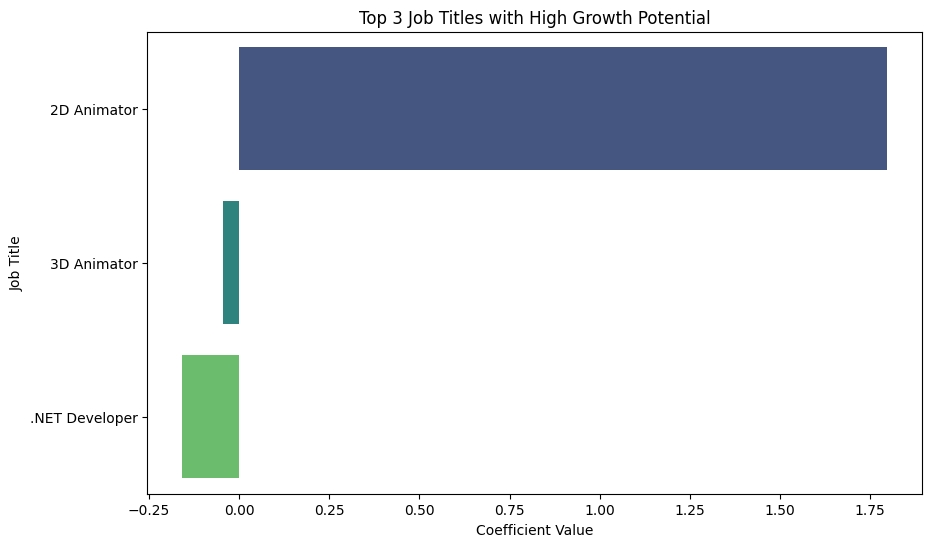

In [ ]:
# Bar chart for top job titles with high growth potential
top_jobs_counts = coefficients[top_jobs_indices]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_jobs_counts, y=top_jobs, palette='viridis')
plt.title('Top 3 Job Titles with High Growth Potential')
plt.xlabel('Coefficient Value')
plt.ylabel('Job Title')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Assuming `X` (features) and `y` (target variable) are already defined
# Initialize Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5)

In [ ]:
# Initialize variables to store results
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

In [ ]:
mean_fpr

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [ ]:
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

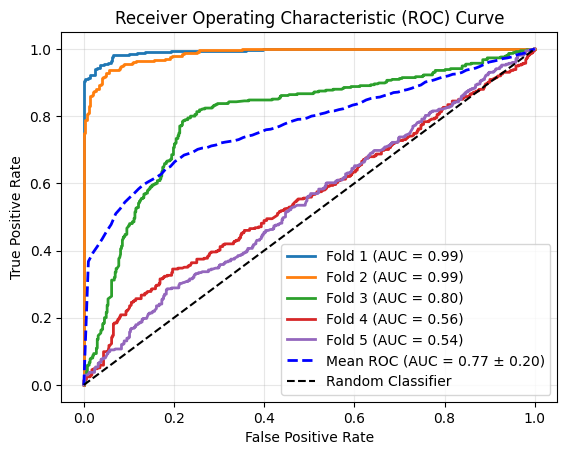

In [ ]:
# Perform cross-validation
for i, (train, test) in enumerate(cv.split(X, y)):
    model.fit(X.iloc[train], y.iloc[train])  # Train the model
    y_score = model.predict_proba(X.iloc[test])[:, 1]  # Get probabilities for positive class

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y.iloc[test], y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Plot ROC curve for this fold
    plt.plot(fpr, tpr, lw=2, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

  # Plot mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', linestyle='--',
         label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2)

# Plot random chance line
plt.plot([0, 1], [0, 1], color='k', linestyle='--', label='Random Classifier')

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()